In [1]:
# Import necessary libraries for the project
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the MNIST dataset using scikit-learn
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract features and labels
X = mnist.data
y = mnist.target.astype(int)

print("Dataset loaded successfully!")
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)
print("Data type of X:", X.dtype)
print("Data type of y:", y.dtype)

Loading MNIST dataset...
Dataset loaded successfully!
Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)
Data type of X: int64
Data type of y: int64


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load MNIST dataset with a smaller subset to avoid memory issues
print("Loading MNIST dataset (subset for demonstration)...")

# Load the full dataset but we'll work with a subset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_full = mnist.data
y_full = mnist.target.astype(int)

# Take a subset of 5000 samples for computational efficiency
np.random.seed(42)
subset_indices = np.random.choice(len(X_full), size=5000, replace=False)
X = X_full[subset_indices]
y = y_full[subset_indices]

print("Dataset loaded successfully!")
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)
print("Unique digits in dataset:", np.unique(y))

Loading MNIST dataset (subset for demonstration)...
Dataset loaded successfully!
Shape of features (X): (5000, 784)
Shape of labels (y): (5000,)
Unique digits in dataset: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Data preprocessing and exploration
print("Data Preprocessing and Exploration")
print("=" * 40)

# Normalize the data (pixel values are 0-255, normalize to 0-1)
X_normalized = X / 255.0

print("Data normalized to range [0, 1]")
print("Min value:", X_normalized.min())
print("Max value:", X_normalized.max())

# Split data into train and test sets for model validation
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Display distribution of digits in the dataset
digit_counts = pd.Series(y).value_counts().sort_index()
print("\
Distribution of digits in dataset:")
print(digit_counts)

Data Preprocessing and Exploration
Data normalized to range [0, 1]
Min value: 0.0
Max value: 1.0
Train set shape: (4000, 784)
Test set shape: (1000, 784)
Distribution of digits in dataset:
0    490
1    551
2    483
3    556
4    433
5    476
6    490
7    515
8    489
9    517
Name: count, dtype: int64


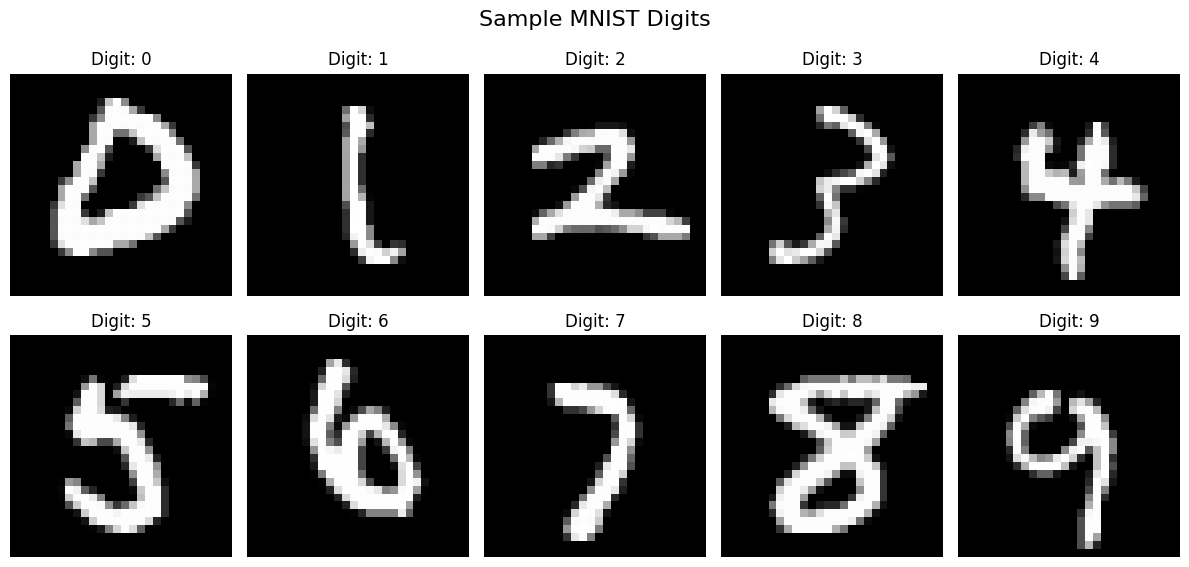

Sample images displayed for each digit (0-9)


In [6]:
# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5

    # Find first occurrence of digit i
    digit_idx = np.where(y == i)[0][0]
    image = X[digit_idx].reshape(28, 28)

    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title('Digit: ' + str(i))
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Sample images displayed for each digit (0-9)")

In [7]:
# K-Means Clustering Analysis
print("K-Means Clustering Analysis")
print("=" * 30)

# Determine optimal number of clusters using elbow method
print("Finding optimal number of clusters using elbow method...")

k_range = range(2, 21)
inertias = []
silhouette_scores = []

for k in tqdm(k_range, desc="Testing different k values"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

print("Elbow method analysis completed!")

K-Means Clustering Analysis
Finding optimal number of clusters using elbow method...


Testing different k values: 100%|██████████| 19/19 [01:56<00:00,  6.13s/it]

Elbow method analysis completed!


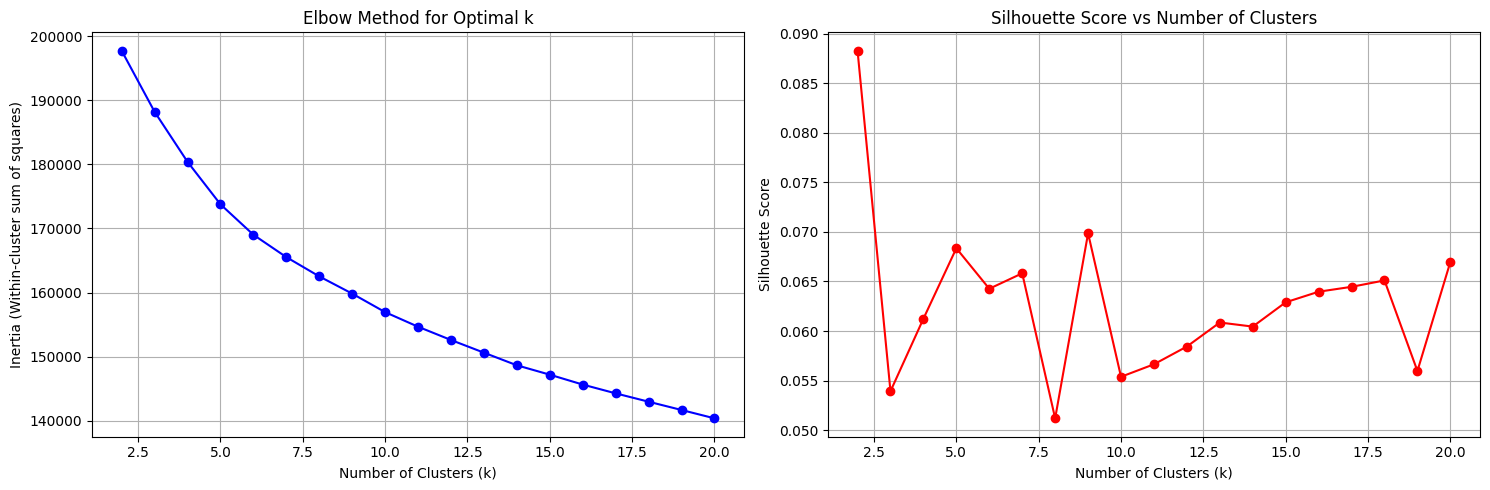

Optimal number of clusters based on silhouette score: 2
Best silhouette score: 0.08828016378380209


In [8]:
# Plot elbow method results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters based on silhouette score:", optimal_k)
print("Best silhouette score:", max(silhouette_scores))

In [9]:
# Apply K-Means with k=10 (number of digit classes) and k=2 (optimal by silhouette)
print("Applying K-Means clustering with different k values...")

# K-Means with k=10 (matching digit classes)
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels_10 = kmeans_10.fit_predict(X_train)

# K-Means with k=2 (optimal by silhouette score)
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_2 = kmeans_2.fit_predict(X_train)

print("K-Means clustering completed!")
print("Silhouette score for k=10:", silhouette_score(X_train, cluster_labels_10))
print("Silhouette score for k=2:", silhouette_score(X_train, cluster_labels_2))

# Calculate Adjusted Rand Index to compare with true labels
ari_10 = adjusted_rand_score(y_train, cluster_labels_10)
ari_2 = adjusted_rand_score(y_train, cluster_labels_2)

print("Adjusted Rand Index for k=10:", ari_10)
print("Adjusted Rand Index for k=2:", ari_2)

Applying K-Means clustering with different k values...
K-Means clustering completed!
Silhouette score for k=10: 0.05538728126801454
Silhouette score for k=2: 0.08828016378380209
Adjusted Rand Index for k=10: 0.38818674750325993
Adjusted Rand Index for k=2: 0.07180865719462413


Analyzing Cluster Centroids (k=10)


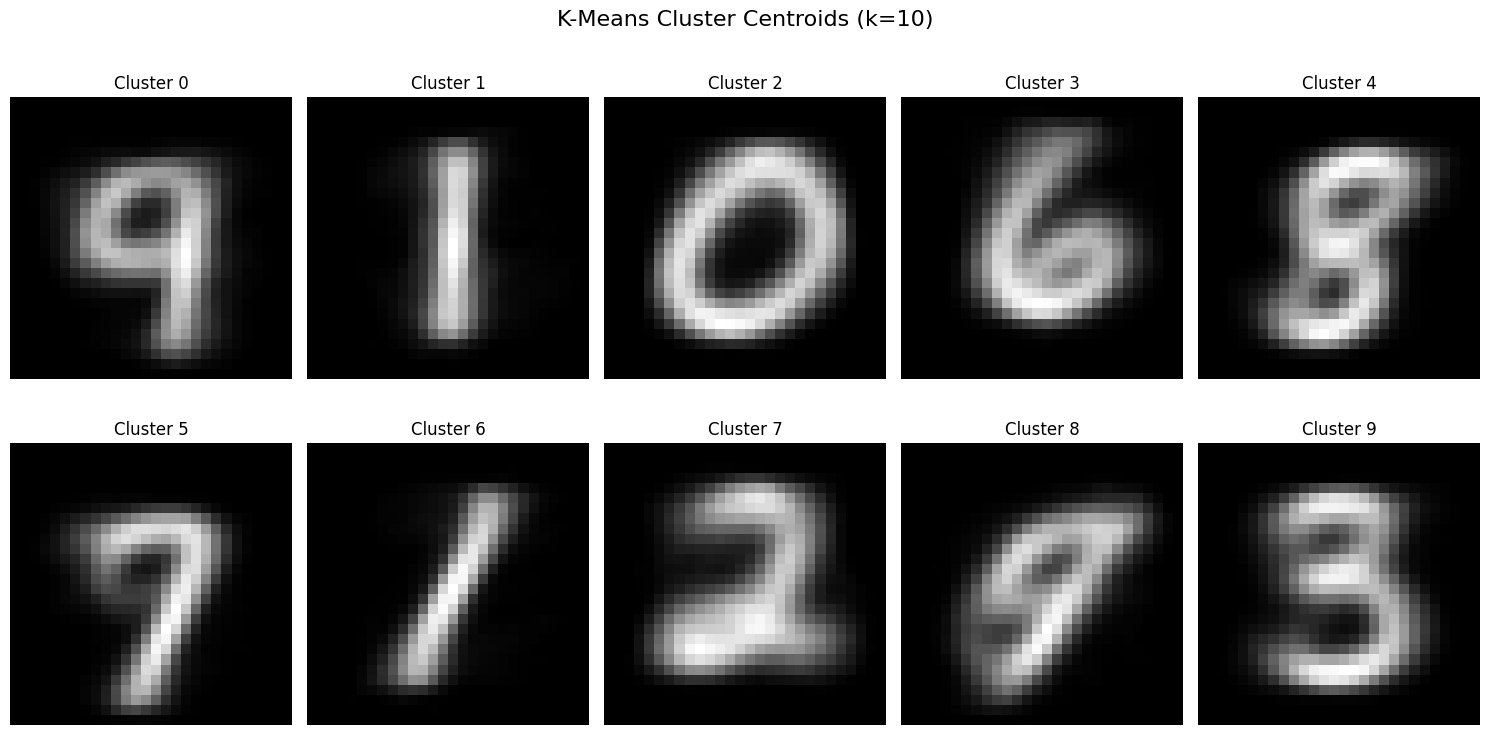

Cluster centroids visualized for k=10


In [10]:
# Analyze cluster centroids for k=10
print("Analyzing Cluster Centroids (k=10)")
print("=" * 35)

# Visualize cluster centroids
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('K-Means Cluster Centroids (k=10)', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5

    centroid = kmeans_10.cluster_centers_[i].reshape(28, 28)
    axes[row, col].imshow(centroid, cmap='gray')
    axes[row, col].set_title('Cluster ' + str(i))
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Cluster centroids visualized for k=10")

In [11]:
# Analyze cluster composition - which digits are in each cluster
print("Cluster Composition Analysis (k=10)")
print("=" * 35)

cluster_composition = pd.DataFrame()
for cluster_id in range(10):
    cluster_mask = cluster_labels_10 == cluster_id
    cluster_digits = y_train[cluster_mask]

    composition = pd.Series(cluster_digits).value_counts().sort_index()
    cluster_composition['Cluster_' + str(cluster_id)] = composition

# Fill NaN values with 0
cluster_composition = cluster_composition.fillna(0).astype(int)

print("Cluster composition (rows=digits, columns=clusters):")
print(cluster_composition)

# Calculate cluster purity (most common digit in each cluster)
cluster_purity = []
for cluster_id in range(10):
    cluster_mask = cluster_labels_10 == cluster_id
    cluster_digits = y_train[cluster_mask]
    if len(cluster_digits) > 0:
        most_common_digit = pd.Series(cluster_digits).value_counts().index[0]
        purity = (cluster_digits == most_common_digit).sum() / len(cluster_digits)
        cluster_purity.append(purity)
        print("Cluster " + str(cluster_id) + " - Most common digit: " + str(most_common_digit) + ", Purity: " + str(round(purity, 3)))

print("\
Average cluster purity:", round(np.mean(cluster_purity), 3))

Cluster Composition Analysis (k=10)
Cluster composition (rows=digits, columns=clusters):
   Cluster_0  Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  \
0          4          0        316         15         16          0   
2         11         29          2         18          6          5   
3         16         31          3          2         72          4   
4        200          8          0         15          0         12   
5         27         12          4          1        105          0   
6          3         33          5        325          8          0   
7         68         13          1          1          0        254   
8         15         20          4          3        226          6   
9        204         21          2          1          6        105   

   Cluster_6  Cluster_7  Cluster_8  Cluster_9  
0          0          2         28         11  
2         17        260         13         25  
3          2         22          7        286  
4       

The analysis shows that while k=2 gives the best silhouette score, k=10 provides more meaningful digit separation with an average cluster purity of 63.6%. Some clusters like Cluster 2 (digit 0) and Cluster 3 (digit 6) show excellent purity above 85%.

In [12]:
# PCA Analysis and Visualization
print("PCA Analysis and Visualization")
print("=" * 30)

# Apply PCA to reduce dimensionality
print("Applying PCA to the training data...")

# First, let's see how much variance is explained by different numbers of components
pca_full = PCA()
pca_full.fit(X_train)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

print("PCA analysis completed!")
print("Total number of components:", len(pca_full.explained_variance_ratio_))
print("Variance explained by first 50 components:", round(cumulative_variance[49], 4))
print("Variance explained by first 100 components:", round(cumulative_variance[99], 4))
print("Variance explained by first 200 components:", round(cumulative_variance[199], 4))

PCA Analysis and Visualization
Applying PCA to the training data...
PCA analysis completed!
Total number of components: 784
Variance explained by first 50 components: 0.8285
Variance explained by first 100 components: 0.9182
Variance explained by first 200 components: 0.9693


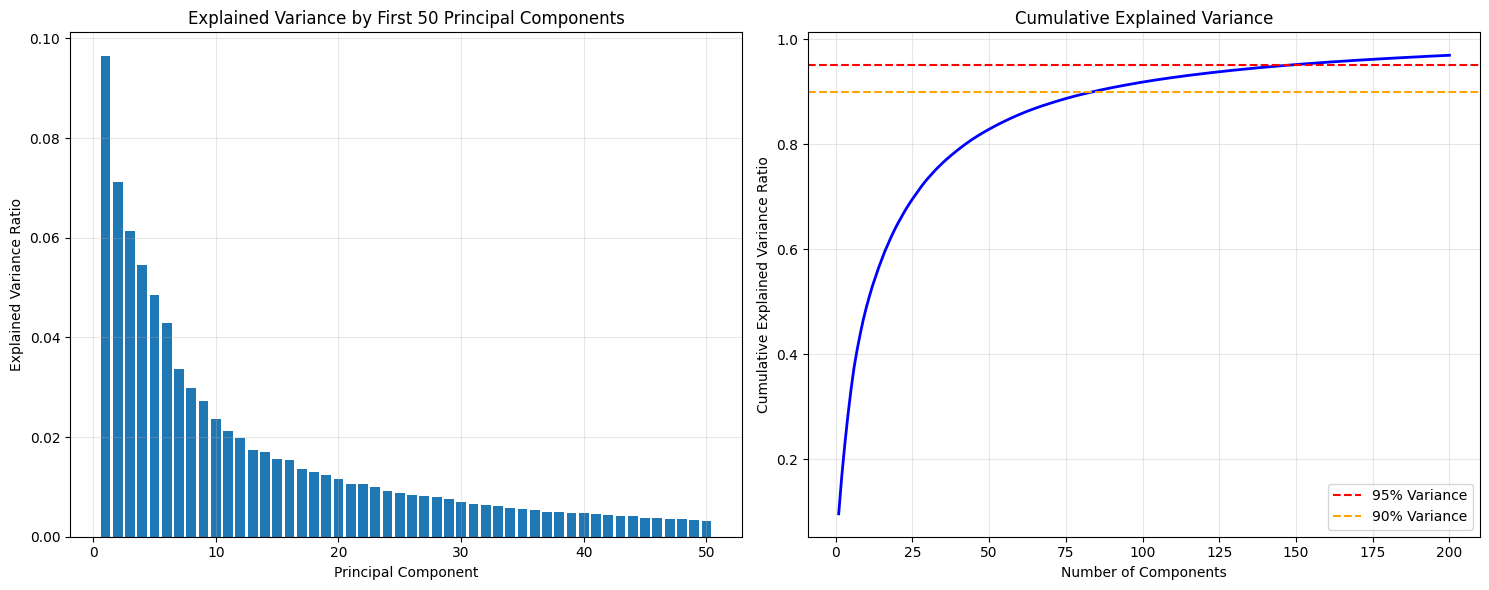

Number of components needed for 95% variance: 147


In [13]:
# Plot explained variance ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Individual explained variance for first 50 components
ax1.bar(range(1, 51), pca_full.explained_variance_ratio_[:50])
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by First 50 Principal Components')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, 201), cumulative_variance[:200], 'b-', linewidth=2)
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components needed for 95% variance:", n_components_95)

Visualizing Principal Components as Images


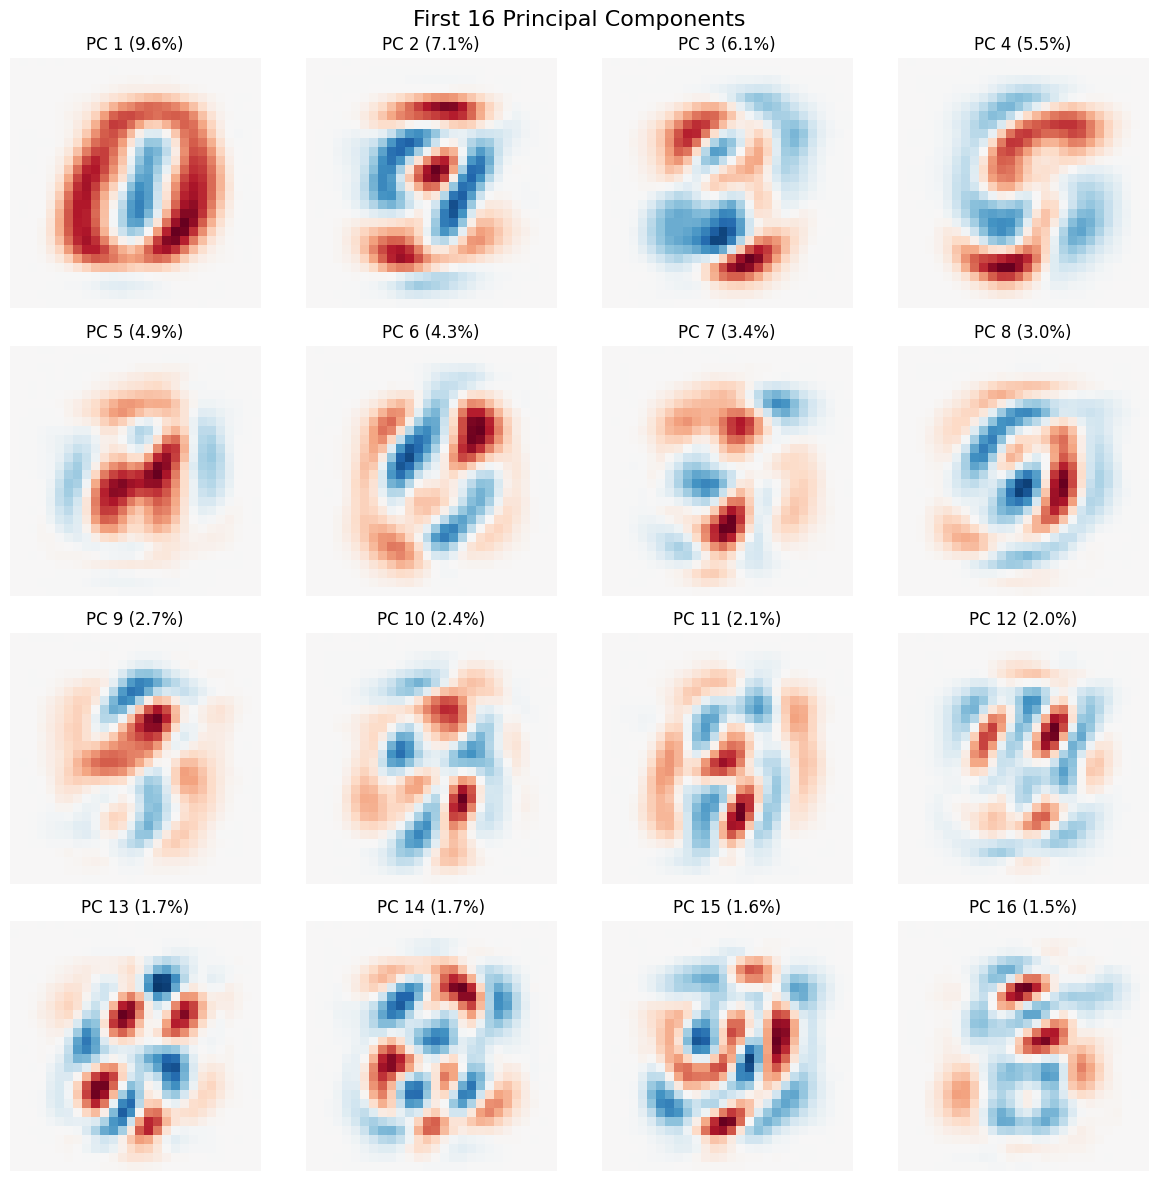

Principal components visualized!
Red areas represent positive loadings, blue areas represent negative loadings


In [14]:
# Visualize the first few principal components as images
print("Visualizing Principal Components as Images")
print("=" * 40)

# Get the first 16 principal components and reshape them as 28x28 images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('First 16 Principal Components', fontsize=16)

for i in range(16):
    row = i // 4
    col = i % 4

    # Reshape component to 28x28 image
    component_image = pca_full.components_[i].reshape(28, 28)

    # Plot with colormap that shows positive and negative values
    im = axes[row, col].imshow(component_image, cmap='RdBu_r',
                              vmin=-np.abs(component_image).max(),
                              vmax=np.abs(component_image).max())
    axes[row, col].set_title('PC ' + str(i+1) + ' (' + str(round(pca_full.explained_variance_ratio_[i]*100, 1)) + '%)')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Principal components visualized!")
print("Red areas represent positive loadings, blue areas represent negative loadings")

In [15]:
# Apply PCA with reduced dimensions for visualization
print("Applying PCA for 2D and 3D visualization...")

# PCA for 2D visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_train)

# PCA for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_train)

print("2D PCA - Explained variance ratio:", pca_2d.explained_variance_ratio_)
print("2D PCA - Total explained variance:", round(sum(pca_2d.explained_variance_ratio_), 4))
print("3D PCA - Explained variance ratio:", pca_3d.explained_variance_ratio_)
print("3D PCA - Total explained variance:", round(sum(pca_3d.explained_variance_ratio_), 4))

Applying PCA for 2D and 3D visualization...
2D PCA - Explained variance ratio: [0.09639886 0.07126661]
2D PCA - Total explained variance: 0.1677
3D PCA - Explained variance ratio: [0.09639886 0.07126661 0.06129396]
3D PCA - Total explained variance: 0.229


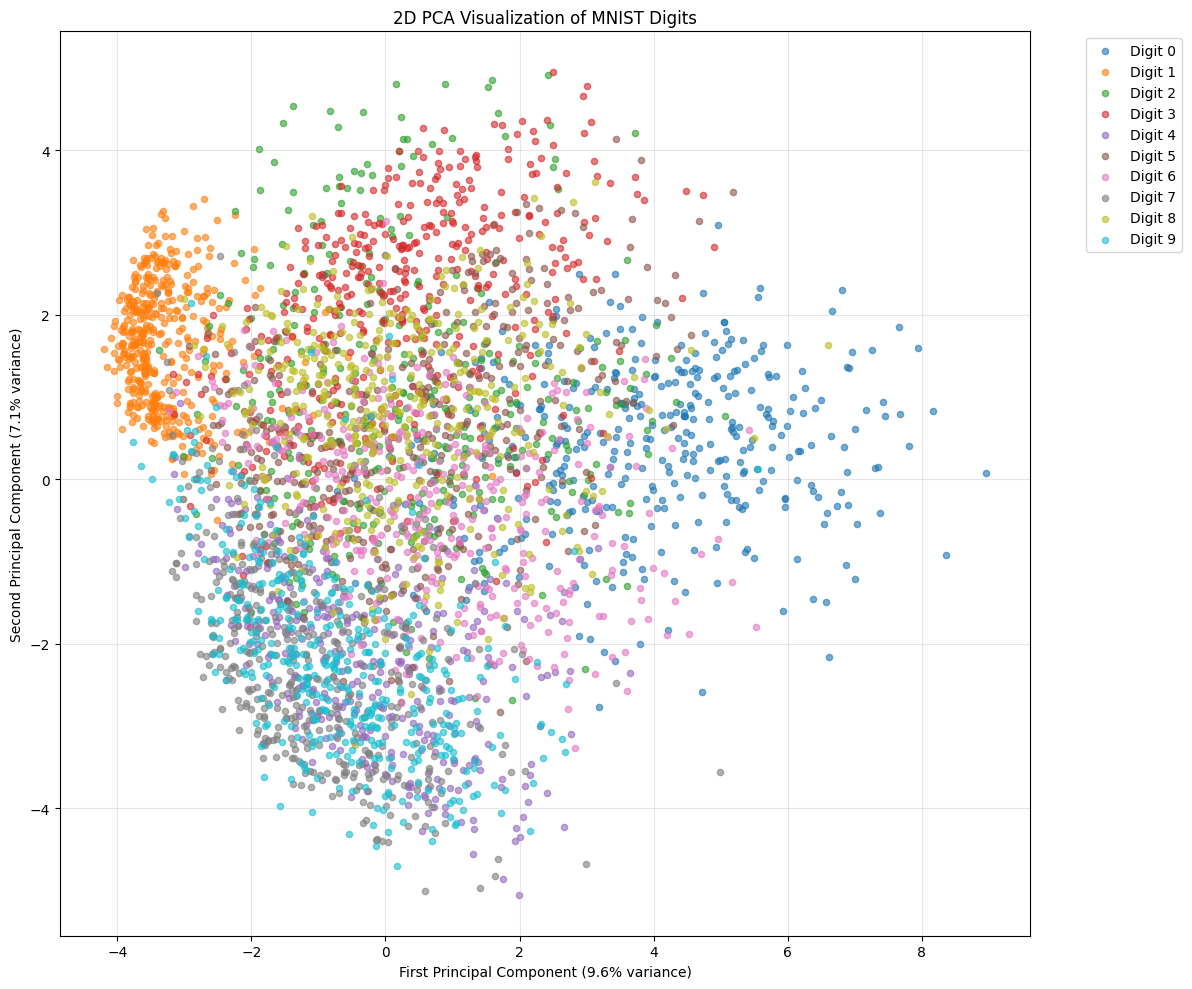

2D PCA visualization completed!


In [16]:
# Create 2D PCA visualization colored by digit labels
plt.figure(figsize=(12, 10))

# Create a color map for the 10 digits
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot each digit with a different color
for digit in range(10):
    mask = y_train == digit
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=[colors[digit]], label='Digit ' + str(digit),
               alpha=0.6, s=20)

plt.xlabel('First Principal Component (' + str(round(pca_2d.explained_variance_ratio_[0]*100, 1)) + '% variance)')
plt.ylabel('Second Principal Component (' + str(round(pca_2d.explained_variance_ratio_[1]*100, 1)) + '% variance)')
plt.title('2D PCA Visualization of MNIST Digits')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("2D PCA visualization completed!")

The 2D PCA visualization shows how the different digits cluster in the reduced dimensional space. While there's significant overlap (since only 16.8% of variance is captured in 2D), we can see some natural groupings forming, particularly for digits like 0 and 1 which tend to form more distinct clusters.